In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

# Provide the path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/xdr_data.csv'

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [6]:
# Top 10 handsets
handset_counts = data['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:\n", handset_counts)


Top 10 Handsets:
 Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [7]:
# Top 3 handset manufacturers
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Manufacturers:\n", top_3_manufacturers)


Top 3 Manufacturers:
 Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [8]:
# Top 5 handsets per top 3 manufacturers
top_5_handsets = data[data['Handset Manufacturer'].isin(top_3_manufacturers.index)]
top_5_handsets_per_manufacturer = top_5_handsets.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)
print("Top 5 Handsets per Manufacturer:\n", top_5_handsets_per_manufacturer)


Top 5 Handsets per Manufacturer:
 Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G

In [9]:
# Task 1.1 - User Behavior Aggregation
user_data = data.groupby('IMEI').agg(
    number_of_sessions=('Bearer Id', 'count'),
    total_duration=('Dur. (ms)', 'sum'),
    total_download_data=('Total DL (Bytes)', 'sum'),
    total_upload_data=('Total UL (Bytes)', 'sum'),
    social_media_DL=('Social Media DL (Bytes)', 'sum'),
    social_media_UL=('Social Media UL (Bytes)', 'sum'),
    google_DL=('Google DL (Bytes)', 'sum'),
    google_UL=('Google UL (Bytes)', 'sum'),
    youtube_DL=('Youtube DL (Bytes)', 'sum'),
    youtube_UL=('Youtube UL (Bytes)', 'sum'),
    netflix_DL=('Netflix DL (Bytes)', 'sum'),
    netflix_UL=('Netflix UL (Bytes)', 'sum'),
    gaming_DL=('Gaming DL (Bytes)', 'sum'),
    gaming_UL=('Gaming UL (Bytes)', 'sum')
).reset_index()


In [10]:
# Calculate Total Data Volume and Average Speeds
user_data['total_data_volume'] = user_data['total_download_data'] + user_data['total_upload_data']
user_data['average_DL_speed'] = user_data['total_download_data'] / user_data['total_duration']
user_data['average_UL_speed'] = user_data['total_upload_data'] / user_data['total_duration']


In [11]:
# Total data volume per application
user_data['total_social_media'] = user_data['social_media_DL'] + user_data['social_media_UL']
user_data['total_google'] = user_data['google_DL'] + user_data['google_UL']
user_data['total_youtube'] = user_data['youtube_DL'] + user_data['youtube_UL']
user_data['total_netflix'] = user_data['netflix_DL'] + user_data['netflix_UL']
user_data['total_gaming'] = user_data['gaming_DL'] + user_data['gaming_UL']


In [12]:
# Task 1.2 - Exploratory Data Analysis (EDA)
# Handling Missing Values
user_data.fillna(user_data.mean(), inplace=True)


In [13]:
# Decile Segmentation based on Duration
user_data['duration_decile'] = pd.qcut(user_data['total_duration'], 10, labels=False)


In [14]:
# Decile Summary
decile_summary = user_data.groupby('duration_decile').agg(
    total_data_volume=('total_data_volume', 'sum')
)
print("Total Data per Decile:\n", decile_summary)


Total Data per Decile:
                  total_data_volume
duration_decile                   
0                     5.457884e+12
1                     6.105586e+12
2                     6.553060e+12
3                     6.179916e+12
4                     5.068734e+12
5                     6.453892e+12
6                     6.174791e+12
7                     7.843768e+12
8                     9.329748e+12
9                     1.491499e+13


In [15]:
# Univariate Analysis (Non-Graphical)
summary_stats = user_data.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
                IMEI  number_of_sessions  total_duration  total_download_data  \
count  1.072700e+05       107270.000000    1.072700e+05         1.072700e+05   
mean   4.719099e+13            1.389009    1.459274e+05         6.333344e+08   
std    2.175666e+13            0.809475    1.863404e+05         4.643530e+08   
min    4.400152e+11            0.000000    7.142000e+03         8.827082e+06   
25%    3.543831e+13            1.000000    7.040425e+04         3.147901e+08   
50%    3.569811e+13            1.000000    1.024485e+05         5.700119e+08   
75%    3.594921e+13            2.000000    1.727990e+05         8.070103e+08   
max    9.900120e+13           18.000000    1.855375e+07         8.156743e+09   

       total_upload_data  social_media_DL  social_media_UL     google_DL  \
count       1.072700e+05     1.072700e+05    107270.000000  1.072700e+05   
mean        5.728149e+07     2.500812e+06     45864.730232  8.011603e+06   
std         3.564029e+07     1

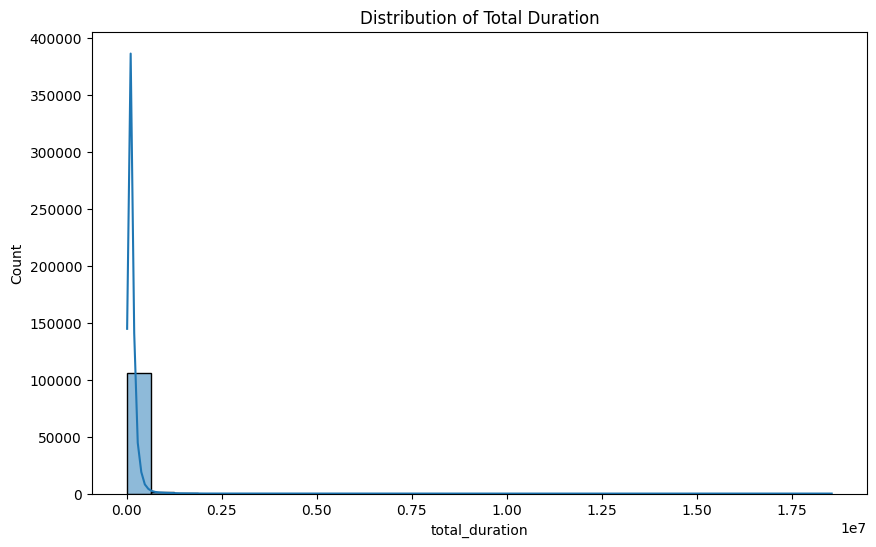

In [16]:
# Graphical Analysis
plt.figure(figsize=(10, 6))
sns.histplot(user_data['total_duration'], bins=30, kde=True)
plt.title('Distribution of Total Duration')
plt.show()

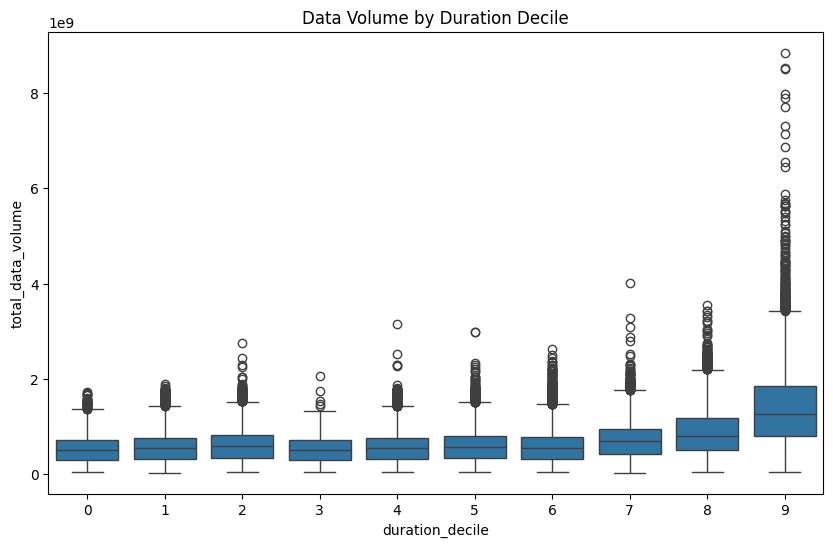

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='duration_decile', y='total_data_volume', data=user_data)
plt.title('Data Volume by Duration Decile')
plt.show()

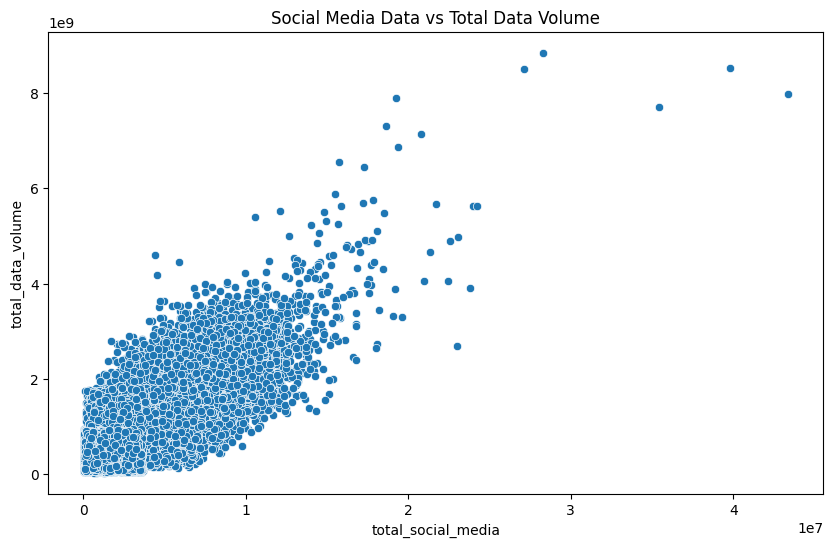

In [18]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_social_media', y='total_data_volume', data=user_data)
plt.title('Social Media Data vs Total Data Volume')
plt.show()


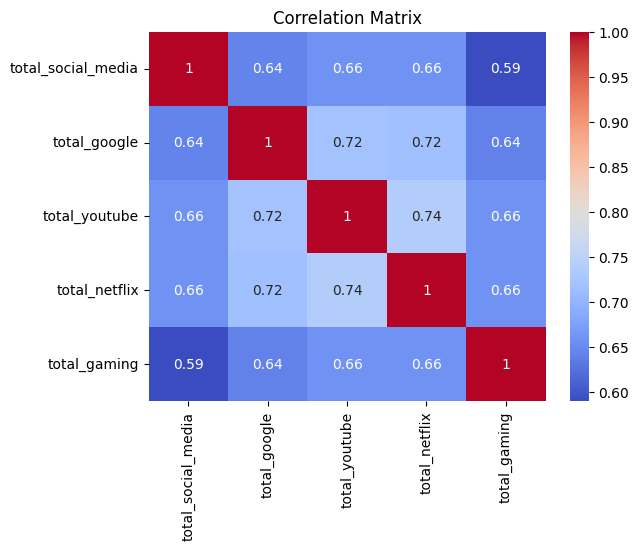

In [19]:
# Correlation Analysis
correlation_matrix = user_data[['total_social_media', 'total_google', 'total_youtube', 'total_netflix', 'total_gaming']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


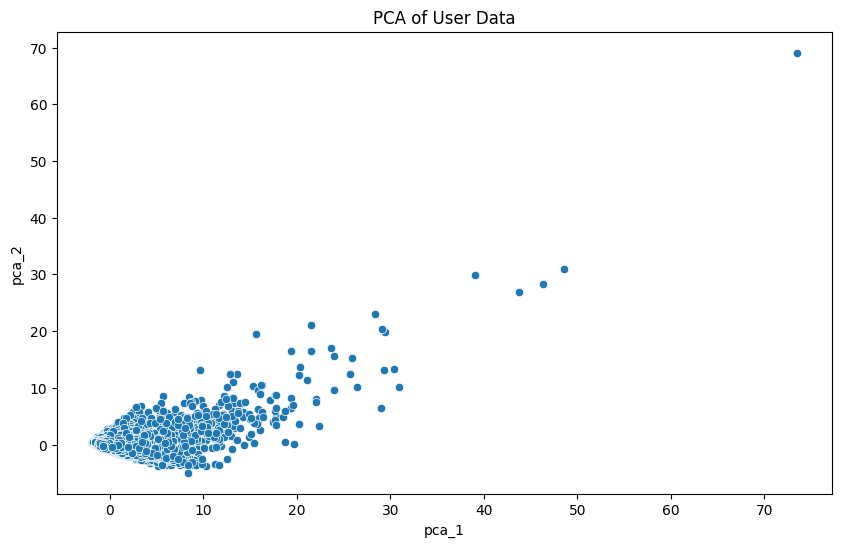

In [20]:
# Principal Component Analysis (PCA)
features = user_data[['total_download_data', 'total_upload_data', 'total_duration']]
scaled_features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

user_data['pca_1'] = pca_result[:, 0]
user_data['pca_2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', data=user_data)
plt.title('PCA of User Data')
plt.show()

# TASK-2

In [56]:
# Check column names in the data
print(data.columns)


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [67]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame containing the telecom data

# Task 2.1 - Aggregate the metrics per customer ID (MSISDN)
# Aggregate sessions frequency and total session duration
engagement_data = data.groupby('MSISDN/Number').agg(
    sessions_frequency=('Bearer Id', 'count'),  # Count of sessions per user
    total_session_duration=('Dur. (ms)', 'sum')  # Sum of session durations per user
).reset_index()


In [68]:
# Calculate the total traffic by summing 'Total DL (Bytes)' and 'Total UL (Bytes)'
total_dl_traffic = data.groupby('MSISDN/Number')['Total DL (Bytes)'].sum()
total_ul_traffic = data.groupby('MSISDN/Number')['Total UL (Bytes)'].sum()


In [69]:
# Combine the download and upload traffic into one column
engagement_data['total_traffic'] = total_dl_traffic + total_ul_traffic


In [70]:
# Display the top 10 customers for each engagement metric
top_10_sessions_frequency = engagement_data[['MSISDN/Number', 'sessions_frequency']].sort_values(by='sessions_frequency', ascending=False).head(10)
top_10_total_session_duration = engagement_data[['MSISDN/Number', 'total_session_duration']].sort_values(by='total_session_duration', ascending=False).head(10)
top_10_total_traffic = engagement_data[['MSISDN/Number', 'total_traffic']].sort_values(by='total_traffic', ascending=False).head(10)


In [71]:
# Print the results
print("Top 10 customers by sessions frequency:\n", top_10_sessions_frequency)
print("Top 10 customers by total session duration:\n", top_10_total_session_duration)
print("Top 10 customers by total traffic:\n", top_10_total_traffic)

Top 10 customers by sessions frequency:
        MSISDN/Number  sessions_frequency
13526   3.362632e+10                  18
13180   3.362578e+10                  17
6437    3.361489e+10                  17
37052   3.365973e+10                  16
76363   3.367588e+10                  15
92923   3.376054e+10                  15
65118   3.366716e+10                  13
92577   3.376041e+10                  12
1279    3.360452e+10                  12
666     3.360313e+10                  12
Top 10 customers by total session duration:
        MSISDN/Number  total_session_duration
13180   3.362578e+10              18553754.0
6437    3.361489e+10               9966898.0
92923   3.376054e+10               9279434.0
13526   3.362632e+10               8791927.0
65118   3.366716e+10               8744914.0
50281   3.366284e+10               6614270.0
57160   3.366469e+10               6288730.0
666     3.360313e+10               6287761.0
66029   3.366746e+10               5649882.0
92577   3.376

In [73]:
from sklearn.preprocessing import MinMaxScaler

# Handle NaN values by filling them with zeros (or use another method like mean/median if preferred)
normalized_data = engagement_data[['sessions_frequency', 'total_session_duration', 'total_traffic']].fillna(0)


In [74]:
# Normalize the engagement metrics
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(normalized_data), columns=['sessions_frequency', 'total_session_duration', 'total_traffic'])


In [75]:
# Add the normalized metrics back to the original DataFrame
engagement_data_normalized = engagement_data[['MSISDN/Number']].join(normalized_data)


In [76]:
# Print the normalized data
print(engagement_data_normalized)


        MSISDN/Number  sessions_frequency  total_session_duration  \
0        3.360100e+10            0.055556                0.005908   
1        3.360100e+10            0.055556                0.009387   
2        3.360100e+10            0.055556                0.006892   
3        3.360101e+10            0.055556                0.002304   
4        3.360101e+10            0.111111                0.001615   
...               ...                 ...                     ...   
106851   3.379000e+10            0.055556                0.000090   
106852   3.379000e+10            0.055556                0.007217   
106853   3.197021e+12            0.055556                0.046922   
106854   3.370000e+14            0.055556                0.013258   
106855   8.823971e+14            0.055556                0.046515   

        total_traffic  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
106

In [77]:
from sklearn.cluster import KMeans

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_data_normalized['cluster'] = kmeans.fit_predict(normalized_data)


In [78]:
# Display the cluster distribution
print("Cluster distribution:\n", engagement_data_normalized['cluster'].value_counts())


Cluster distribution:
 cluster
1    77769
0    25836
2     3251
Name: count, dtype: int64


In [79]:
# Add the cluster labels to the original engagement data
engagement_data['cluster'] = engagement_data_normalized['cluster']


In [80]:
# Compute the summary statistics (min, max, average, total)
cluster_summary = engagement_data.groupby('cluster').agg(
    min_sessions_frequency=('sessions_frequency', 'min'),
    max_sessions_frequency=('sessions_frequency', 'max'),
    avg_sessions_frequency=('sessions_frequency', 'mean'),
    total_sessions_frequency=('sessions_frequency', 'sum'),

    min_session_duration=('total_session_duration', 'min'),
    max_session_duration=('total_session_duration', 'max'),
    avg_session_duration=('total_session_duration', 'mean'),
    total_session_duration=('total_session_duration', 'sum'),

    min_total_traffic=('total_traffic', 'min'),
    max_total_traffic=('total_traffic', 'max'),
    avg_total_traffic=('total_traffic', 'mean'),
    total_total_traffic=('total_traffic', 'sum')
).reset_index()

In [81]:
print(cluster_summary)

   cluster  min_sessions_frequency  max_sessions_frequency  \
0        0                       2                       3   
1        1                       0                       1   
2        2                       3                      18   

   avg_sessions_frequency  total_sessions_frequency  min_session_duration  \
0                2.170963                     56089               18235.0   
1                0.995049                     77384                7142.0   
2                4.624116                     15033               46896.0   

   max_session_duration  avg_session_duration  total_session_duration  \
0             2319813.0         213511.254645            5.516277e+09   
1             1573420.0         103528.004025            8.051269e+09   
2            18553754.0         630972.481083            2.051292e+09   

   min_total_traffic  max_total_traffic  avg_total_traffic  \
0                NaN                NaN                NaN   
1                NaN     

In [82]:
# Define the application columns
application_columns = {
    'Social Media': ['Social Media DL (Bytes)', 'Social Media UL (Bytes)'],
    'Google': ['Google DL (Bytes)', 'Google UL (Bytes)'],
    'Email': ['Email DL (Bytes)', 'Email UL (Bytes)'],
    'Youtube': ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
    'Netflix': ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
    'Gaming': ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
    'Other': ['Other DL (Bytes)', 'Other UL (Bytes)']
}


In [83]:
# Initialize an empty list for storing the results
application_traffic = []


In [84]:
# Loop through each application and aggregate the traffic
for app, cols in application_columns.items():
    dl_col, ul_col = cols
    total_dl_traffic = data[dl_col].sum()
    total_ul_traffic = data[ul_col].sum()
    total_traffic = total_dl_traffic + total_ul_traffic
    application_traffic.append([app, total_dl_traffic, total_ul_traffic, total_traffic])


In [85]:
# Create a DataFrame from the aggregated traffic
application_traffic_df = pd.DataFrame(application_traffic, columns=['Application', 'Total DL Traffic (Bytes)', 'Total UL Traffic (Bytes)', 'Total Traffic (Bytes)'])


In [86]:

# Display the top 10 most engaged applications based on total traffic
top_10_applications = application_traffic_df.sort_values(by='Total Traffic (Bytes)', ascending=False).head(10)
print("Top 10 applications by total traffic:\n", top_10_applications)


Top 10 applications by total traffic:
     Application  Total DL Traffic (Bytes)  Total UL Traffic (Bytes)  \
5        Gaming              6.330713e+13              1.243268e+12   
6         Other              6.316550e+13              1.239728e+12   
3       Youtube              1.745123e+12              1.651423e+12   
4       Netflix              1.744039e+12              1.650274e+12   
1        Google              8.626186e+11              3.084833e+11   
2         Email              2.687611e+11              7.010648e+10   
0  Social Media              2.693001e+11              4.939298e+09   

   Total Traffic (Bytes)  
5           6.455040e+13  
6           6.440523e+13  
3           3.396545e+12  
4           3.394314e+12  
1           1.171102e+12  
2           3.388676e+11  
0           2.742394e+11  


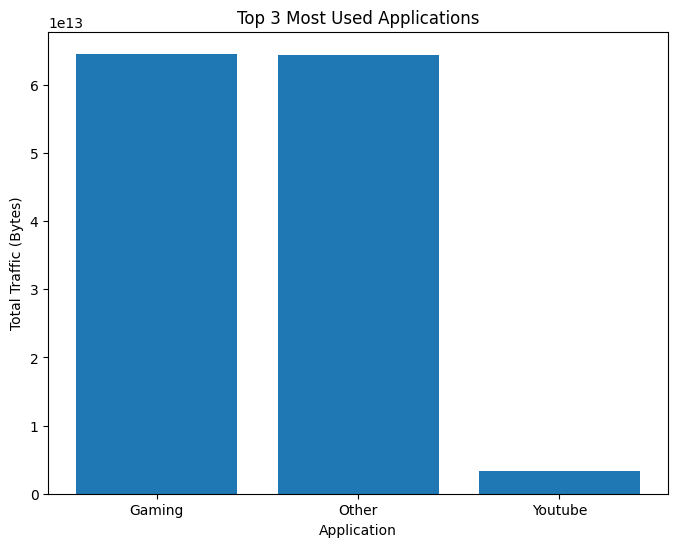

In [87]:
import matplotlib.pyplot as plt

# Plot the top 3 most used applications by total traffic
top_3_applications = application_traffic_df.sort_values(by='Total Traffic (Bytes)', ascending=False).head(3)
plt.figure(figsize=(8, 6))
plt.bar(top_3_applications['Application'], top_3_applications['Total Traffic (Bytes)'])
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.title('Top 3 Most Used Applications')
plt.show()

In [88]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using the normalized data for elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)


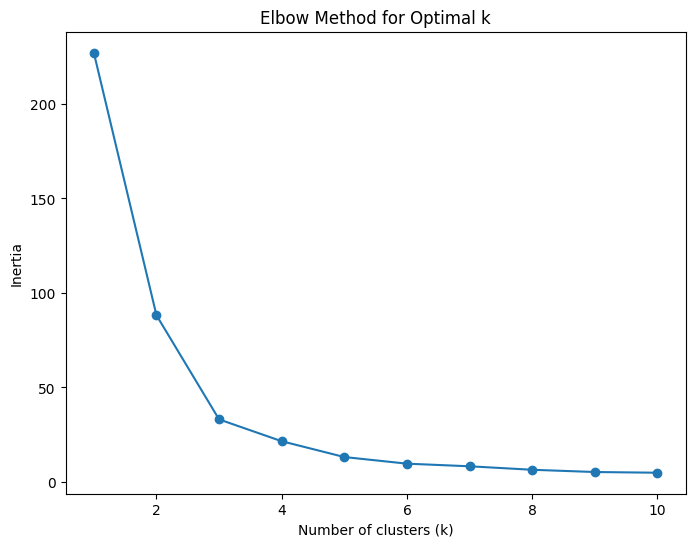

In [89]:
# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# TASK-3

In [95]:
import pandas as pd

# Step 1: Handle missing values for the relevant columns
data['TCP DL Retrans. Vol (Bytes)'].fillna(data['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
data['TCP UL Retrans. Vol (Bytes)'].fillna(data['TCP UL Retrans. Vol (Bytes)'].mean(), inplace=True)
data['Avg RTT DL (ms)'].fillna(data['Avg RTT DL (ms)'].mean(), inplace=True)
data['Avg RTT UL (ms)'].fillna(data['Avg RTT UL (ms)'].mean(), inplace=True)
data['Avg Bearer TP DL (kbps)'].fillna(data['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
data['Avg Bearer TP UL (kbps)'].fillna(data['Avg Bearer TP UL (kbps)'].mean(), inplace=True)

# Replace missing 'Handset Type' with the mode (most frequent value)
data['Handset Type'].fillna(data['Handset Type'].mode()[0], inplace=True)

# Step 2: Aggregate data per customer (MSISDN/Number)
def get_mode(series):
    return series.mode()[0]  # Get the most frequent value (mode)

experience_data = data.groupby('MSISDN/Number').agg(
    avg_tcp_retransmission=('TCP DL Retrans. Vol (Bytes)', 'mean'),  # Average TCP retransmission
    avg_rtt=('Avg RTT DL (ms)', 'mean'),  # Average RTT
    handset_type=('Handset Type', get_mode),  # Mode of Handset Type (custom function)
    avg_throughput=('Avg Bearer TP DL (kbps)', 'mean')  # Average throughput (using DL throughput as a proxy)
).reset_index()

# Display the aggregated experience data
print(experience_data.head())


<ipython-input-95-2bb8956172ce>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TCP DL Retrans. Vol (Bytes)'].fillna(data['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
<ipython-input-95-2bb8956172ce>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

   MSISDN/Number  avg_tcp_retransmission     avg_rtt  \
0   3.360100e+10            2.080991e+07   46.000000   
1   3.360100e+10            2.080991e+07   30.000000   
2   3.360100e+10            2.080991e+07  109.795706   
3   3.360101e+10            1.066000e+03   69.000000   
4   3.360101e+10            1.507977e+07   57.000000   

                     handset_type  avg_throughput  
0  Huawei P20 Lite Huawei Nova 3E            37.0  
1          Apple iPhone 7 (A1778)            48.0  
2                       undefined            48.0  
3         Apple iPhone 5S (A1457)           204.0  
4         Apple iPhone Se (A1723)         20197.5  


In [96]:
# Step 1: Get the top, bottom, and most frequent values for each parameter

# TCP retransmission
top_tcp = data['TCP DL Retrans. Vol (Bytes)'].nlargest(10)
bottom_tcp = data['TCP DL Retrans. Vol (Bytes)'].nsmallest(10)
most_frequent_tcp = data['TCP DL Retrans. Vol (Bytes)'].mode().head(10)

# RTT
top_rtt = data['Avg RTT DL (ms)'].nlargest(10)
bottom_rtt = data['Avg RTT DL (ms)'].nsmallest(10)
most_frequent_rtt = data['Avg RTT DL (ms)'].mode().head(10)

# Throughput
top_throughput = data['Avg Bearer TP DL (kbps)'].nlargest(10)
bottom_throughput = data['Avg Bearer TP DL (kbps)'].nsmallest(10)
most_frequent_throughput = data['Avg Bearer TP DL (kbps)'].mode().head(10)

# Display results
print("Top 10 TCP retransmission values:\n", top_tcp)
print("Bottom 10 TCP retransmission values:\n", bottom_tcp)
print("Most frequent TCP retransmission values:\n", most_frequent_tcp)

print("Top 10 RTT values:\n", top_rtt)
print("Bottom 10 RTT values:\n", bottom_rtt)
print("Most frequent RTT values:\n", most_frequent_rtt)

print("Top 10 Throughput values:\n", top_throughput)
print("Bottom 10 Throughput values:\n", bottom_throughput)
print("Most frequent Throughput values:\n", most_frequent_throughput)


Top 10 TCP retransmission values:
 77979     4.294426e+09
135678    4.291380e+09
34645     4.289877e+09
140813    4.289488e+09
3782      4.288060e+09
119684    4.275259e+09
39637     4.268432e+09
76990     4.259997e+09
59016     4.256650e+09
41209     4.254644e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Bottom 10 TCP retransmission values:
 59717     2.0
125094    2.0
2850      4.0
39610     4.0
52488     4.0
60376     4.0
60426     4.0
75093     4.0
100314    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Most frequent TCP retransmission values:
 0    2.080991e+07
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Top 10 RTT values:
 30166     96923.0
29927     64640.0
17910     55811.0
5989      54847.0
22851     26971.0
23455     26250.0
1373      25873.0
81274     25602.0
97321     25374.0
100584    24733.0
Name: Avg RTT DL (ms), dtype: float64
Bottom 10 RTT values:
 42612     0.0
52225     0.0
60152     0.0
61152     0.0
61345     0.0
103328    0.0
12

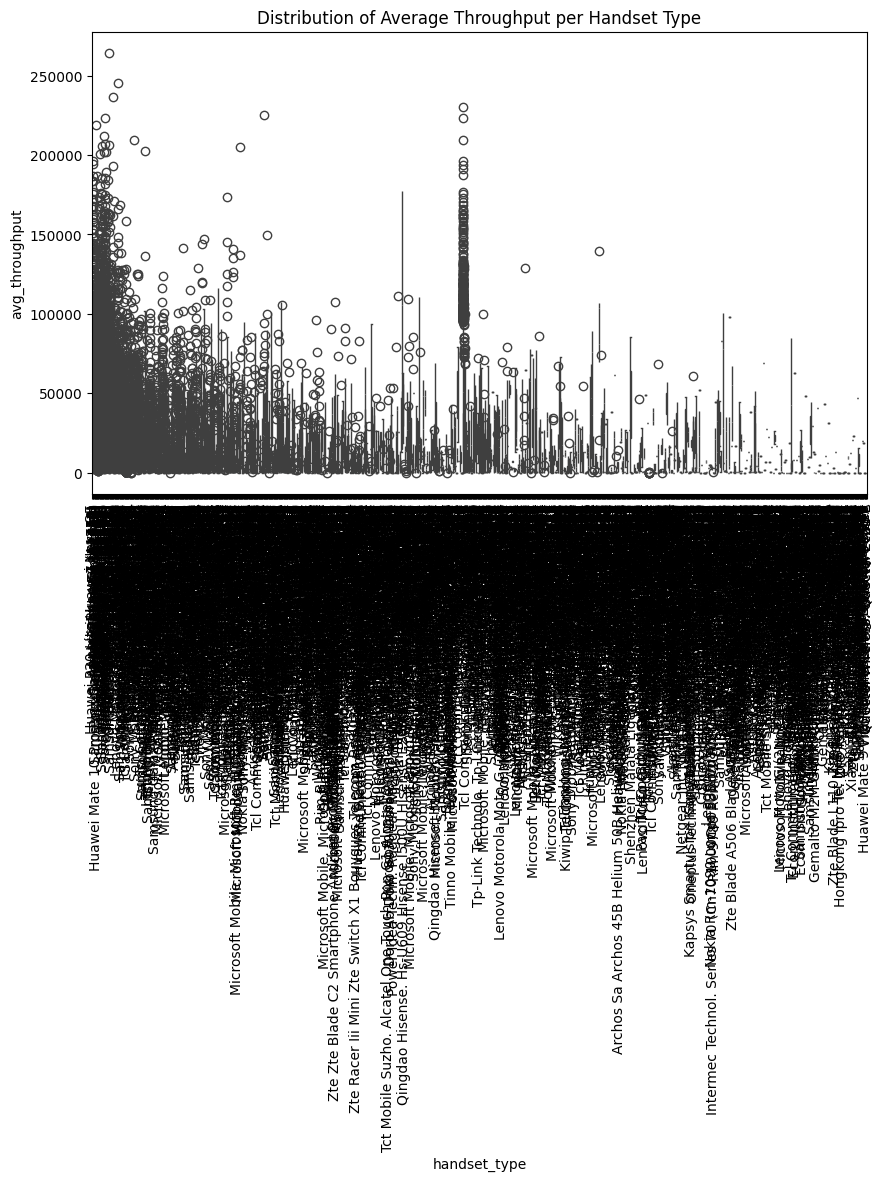

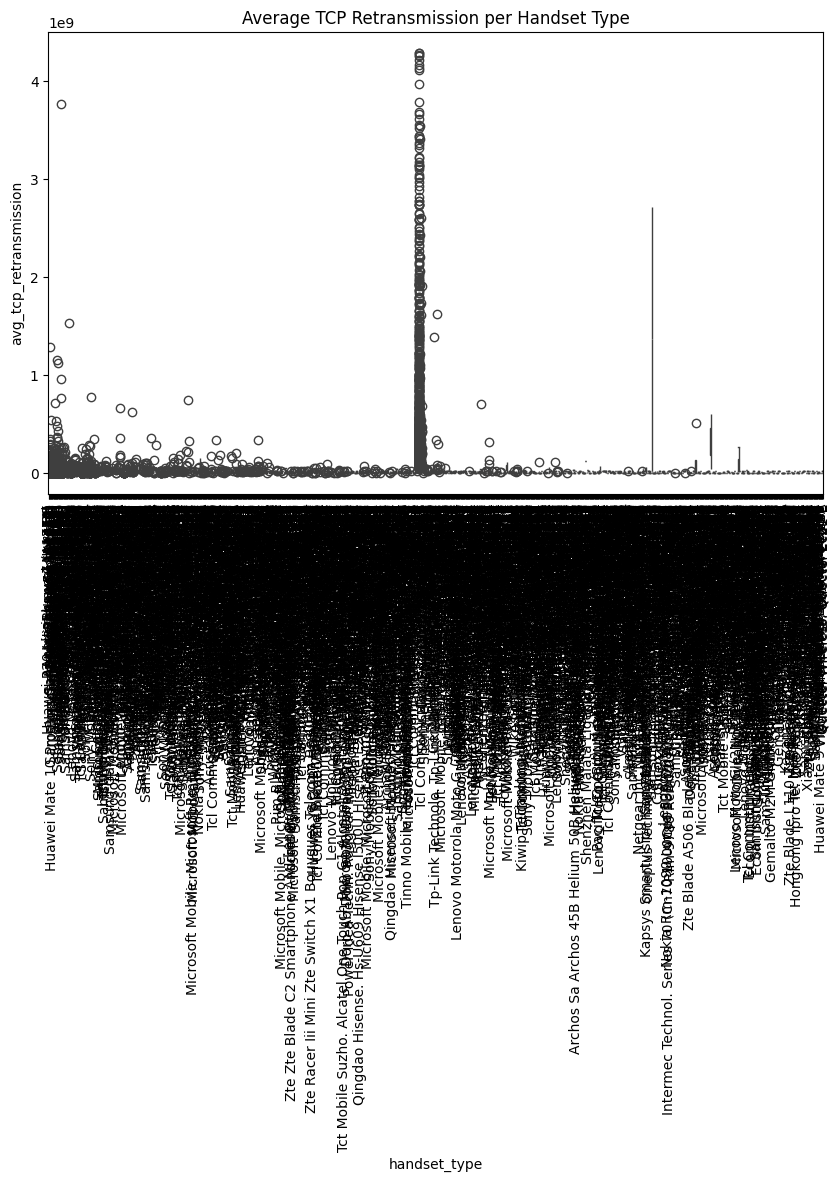

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of average throughput per handset type
plt.figure(figsize=(10, 6))
sns.boxplot(data=experience_data, x='handset_type', y='avg_throughput')
plt.title("Distribution of Average Throughput per Handset Type")
plt.xticks(rotation=90)
plt.show()

# Distribution of average TCP retransmission per handset type
plt.figure(figsize=(10, 6))
sns.boxplot(data=experience_data, x='handset_type', y='avg_tcp_retransmission')
plt.title("Average TCP Retransmission per Handset Type")
plt.xticks(rotation=90)
plt.show()


Cluster 0 - Group Description:
        MSISDN/Number  avg_tcp_retransmission       avg_rtt  avg_throughput  \
count   1.824400e+04            1.824400e+04  18244.000000    18244.000000   
mean    3.367763e+10            1.959627e+07     77.319787    49171.539659   
std     4.385404e+07            7.768724e+07    112.742139    22735.042041   
min     3.360103e+10            3.100000e+01     15.000000    25526.666667   
25%     3.365876e+10            5.235614e+05     40.729167    33396.000000   
50%     3.366429e+10            3.684858e+06     56.000000    42624.500000   
75%     3.368641e+10            1.133274e+07     80.286963    57497.750000   
max     3.378998e+10            1.118514e+09   5379.000000   264448.000000   

       cluster  
count  18244.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
Cluster 1 - Group Description:
        MSISDN/Number  avg_tcp_retransmission       avg_rtt  avg_throughput  \
co

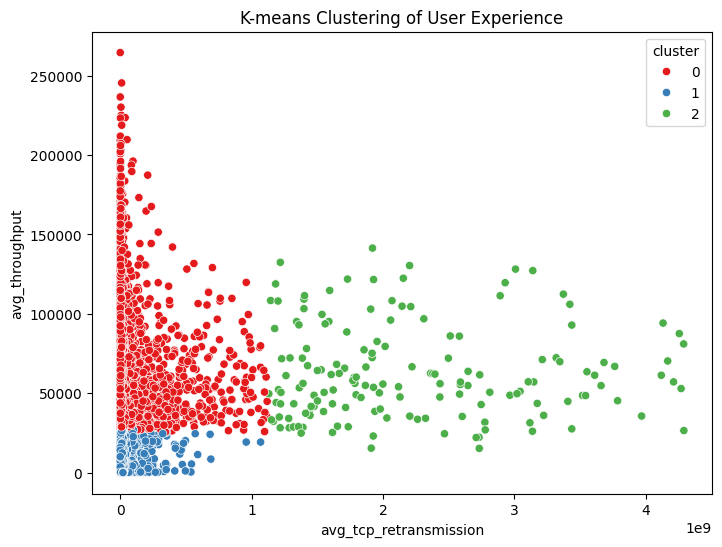

In [100]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare the data for clustering
experience_data_for_clustering = experience_data[['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput']]

# Step 2: Normalize the data
scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(experience_data_for_clustering),
                               columns=['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput'])

# Step 3: Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
experience_data['cluster'] = kmeans.fit_predict(normalized_data)

# Step 4: Cluster analysis
cluster_0 = experience_data[experience_data['cluster'] == 0]
cluster_1 = experience_data[experience_data['cluster'] == 1]
cluster_2 = experience_data[experience_data['cluster'] == 2]

# Display cluster statistics
print("Cluster 0 - Group Description:\n", cluster_0.describe())
print("Cluster 1 - Group Description:\n", cluster_1.describe())
print("Cluster 2 - Group Description:\n", cluster_2.describe())

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=experience_data, x='avg_tcp_retransmission', y='avg_throughput', hue='cluster', palette='Set1')
plt.title("K-means Clustering of User Experience")
plt.show()


# *TASK-4*

In [ ]:
import numpy as np
import pandas as pd

# Assuming engagement_clusters_centroids and experience_clusters_centroids are already defined:
# engagement_clusters_centroids = kmeans_engagement.cluster_centers_  # Centroids from k-means on engagement data
# experience_clusters_centroids = kmeans_experience.cluster_centers_  # Centroids from k-means on experience data

# Define Euclidean distance function
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Initialize empty lists for the scores
engagement_scores = []
experience_scores = []

# Iterate over the rows of experience_data to calculate the engagement and experience scores
for idx, row in experience_data.iterrows():
    # Calculate the engagement score (distance to the first (least engaged) cluster centroid)
    engagement_distance = euclidean_distance(row[['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput']], engagement_clusters_centroids[0])
    engagement_scores.append(engagement_distance)

    # Calculate the experience score (distance to the worst experience cluster centroid)
    experience_distance = euclidean_distance(row[['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput']], experience_clusters_centroids[2])
    experience_scores.append(experience_distance)

# Add the calculated scores to the DataFrame
experience_data['engagement_score'] = engagement_scores
experience_data['experience_score'] = experience_scores

# Calculate the satisfaction score as the average of engagement and experience scores
experience_data['satisfaction_score'] = (experience_data['engagement_score'] + experience_data['experience_score']) / 2

# Check the result
print(experience_data[['MSISDN/Number', 'engagement_score', 'experience_score', 'satisfaction_score']].head())


In [ ]:
# Sort by satisfaction score in descending order and select the top 10
top_10_satisfied_customers = experience_data.sort_values(by='satisfaction_score', ascending=False).head(10)

# Display the top 10 customers
print(top_10_satisfied_customers[['MSISDN/Number', 'satisfaction_score']])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = experience_data[['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput']]
y = experience_data['satisfaction_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


In [ ]:
from sklearn.cluster import KMeans

# Select engagement and experience scores for clustering
X_cluster = experience_data[['engagement_score', 'experience_score']]

# Apply KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
experience_data['cluster'] = kmeans.fit_predict(X_cluster)

# Display the results
print(experience_data[['MSISDN/Number', 'engagement_score', 'experience_score', 'cluster']].head())


In [ ]:
# Group by the cluster and calculate the average satisfaction and experience scores
cluster_aggregation = experience_data.groupby('cluster').agg({
    'satisfaction_score': 'mean',
    'experience_score': 'mean'
}).reset_index()

# Display the aggregated results
print(cluster_aggregation)


In [ ]:
import mysql.connector

# Connect to your MySQL database
db_connection = mysql.connector.connect(
    host='localhost',  # Replace with your host
    user='root',       # Replace with your MySQL username
    password='password', # Replace with your MySQL password
    database='your_database' # Replace with your database name
)

# Create a cursor object to interact with the database
cursor = db_connection.cursor()

# Create table for storing the results
cursor.execute("""
CREATE TABLE IF NOT EXISTS user_scores (
    MSISDN_Number VARCHAR(20),
    engagement_score FLOAT,
    experience_score FLOAT,
    satisfaction_score FLOAT,
    cluster INT
)
""")

# Insert the data into the table
for idx, row in experience_data.iterrows():
    cursor.execute("""
    INSERT INTO user_scores (MSISDN_Number, engagement_score, experience_score, satisfaction_score, cluster)
    VALUES (%s, %s, %s, %s, %s)
    """, (row['MSISDN/Number'], row['engagement_score'], row['experience_score'], row['satisfaction_score'], row['cluster']))

# Commit the transaction
db_connection.commit()

# Perform a SELECT query to verify the results
cursor.execute("SELECT * FROM user_scores LIMIT 10")
print(cursor.fetchall())

# Close the cursor and connection
cursor.close()
db_connection.close()
